In [3]:
#Loading libraries
import csv
import sqlite3
import pandas as pd
import sqlite3
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
! pip install seaborn
import seaborn as sns

     |████████████████████████████████| 283 kB 3.5 MB/s eta 0:00:01


In [6]:
pip install pandas plotnine

Note: you may need to restart the kernel to use updated packages.


In [7]:
from plotnine import *

### Part1

I will use the data on the Chuvash additive particle that I have collected. This data will be loaded in csv format and contains the following information:ID of example, meaning of the particle in this example, after which part of speech the particle is placed, is stress on the particle or on the previous word and the position of the particle in the sentence.

Firstly, a table with information about ID, Meaning and Part Of Speech will be created. 

In [8]:
con = sqlite3.connect("additive.db")
cur = con.cursor()
cur.execute("DROP TABLE IF EXISTS additive")
cur.execute("CREATE TABLE additive (ID, Meaning, PartOfSpeech);")  # all the columns names

with open('d.csv','r', encoding='utf-8') as fin:
    dr = csv.DictReader(fin)  # a comma is the default separator
    to_db = [(i['ID'], i['Meaning'], i['PartOfSpeech']) for i in dr]  # put the columns' names again

cur.executemany("INSERT INTO additive (ID, Meaning, PartOfSpeech) VALUES (?, ?, ?);", to_db)  # and again, the names of the columns

for i in cur.execute("SELECT * FROM additive"):
    print(i)
    
con.commit()

('201__An.104.1', 'Additive', 'Noun')
('201__An.115.1', 'Indef', 'Pronoun')
('201__An.125.1', 'Indef', 'Pronoun')
('201__An.129.1', 'Additive', 'Noun')
('201__An.13.1', 'ScalAdditive', 'Noun')
('201__An.146.1', 'ScalAdditive', 'Pronoun')
('201__An.156.1', 'Collective', 'Num')
('201__An.184.1', 'Additive', 'Adverb')
('201__An.193.1', 'Coordination', 'Verb')
('201__An.194.1', 'Coordination', 'Verb')
('201__An.197.1', 'Additive', 'Pronoun')
('201__An.198.1', 'Additive', 'Noun')
('201__An.199.1', 'Indef', 'Pronoun')
('201__An.204.1', 'Additive', 'Pronoun')
('201__An.236.1', 'Coordination', 'Verb')
('201__An.35.1', 'ScalAdditive', 'Adj')
('201__An.47.1', 'Neg', 'Pronoun')
('201__An.74.1', 'Coordination', 'Verb')
('201__An.96.1', 'Additive', 'Dem')
('201__Zi.10.1', 'Indef', 'Pronoun')
('201__Zi.10.1', 'Coordination', 'Noun')
('201__Zi.12.1', 'Indef', 'Pronoun')
('201__Zi.13.1', 'Indef', 'Pronoun')
('201__Zi.21.1', 'ScalAdditive', 'Noun')


Secondly, a table with information about ID, position of stress and position of the particle in clause will be created.

In [9]:
con1 = sqlite3.connect("additive1.db")
cur1 = con.cursor()
cur1.execute("DROP TABLE IF EXISTS additive1")
cur1.execute("CREATE TABLE additive1 (ID, StressOnClitic, StressOnWord, EndOfClause);")  # all the columns names

with open('d.csv','r', encoding='utf-8') as fin:
    dr = csv.DictReader(fin)  # a comma is the default separator
    to_db = [(i['ID'], i['StressOnClitic'], i['StressOnWord'],  i['EndOfClause']) for i in dr]  # put the columns' names again

cur1.executemany("INSERT INTO additive1 (ID, StressOnClitic, StressOnWord, EndOfClause) VALUES (?, ?, ?, ?);", to_db)  # and again, the names of the columns

for i in cur1.execute("SELECT * FROM additive1"):
    print(i)
    
con1.commit()

('201__An.104.1', 'Yes', 'Yes', 'Yes')
('201__An.115.1', 'Yes', 'Yes', 'No')
('201__An.125.1', 'No', 'Yes', 'No')
('201__An.129.1', 'No', 'Yes', 'No')
('201__An.13.1', 'No', 'Yes', 'No')
('201__An.146.1', 'Yes', 'Yes', 'No')
('201__An.156.1', 'Yes', 'Yes', 'No')
('201__An.184.1', 'No', 'Yes', 'No')
('201__An.193.1', 'Yes', 'Yes', 'No')
('201__An.194.1', 'Yes', 'Yes', 'Yes')
('201__An.197.1', 'No', 'Yes', 'No')
('201__An.198.1', 'Yes', 'Yes', 'No')
('201__An.199.1', 'No', 'Yes', 'No')
('201__An.204.1', 'Yes', 'No', 'No')
('201__An.236.1', 'Yes', 'Yes', 'No')
('201__An.35.1', 'No', 'Yes', 'No')
('201__An.47.1', 'Yes', 'Yes', 'No')
('201__An.74.1', 'Yes', 'No', 'No')
('201__An.96.1', 'Yes', 'No', 'No')
('201__Zi.10.1', 'Yes', 'Yes', 'No')
('201__Zi.10.1', 'Yes', 'Yes', 'No')
('201__Zi.12.1', 'Yes', 'No', 'No')
('201__Zi.13.1', 'Yes', 'No', 'No')
('201__Zi.21.1', 'Yes', 'Yes', 'No')


The first table contains information about about the possibility to use particles in certain meanings with different parts of speech. The second table is devoted exclusively to formal features. Below these two tables will be joined by ID. I will use inner join to get all the qualities that are characteristic of ID  in question.

In [11]:
con2 = sqlite3.connect("additivefull.db")
cur = con.cursor()
cur.execute('SELECT * FROM additive INNER JOIN additive1 ON additive.ID = additive1.ID')
print(cur.fetchall())
con2.commit()

[('201__An.104.1', 'Additive', 'Noun', '201__An.104.1', 'Yes', 'Yes', 'Yes'), ('201__An.115.1', 'Indef', 'Pronoun', '201__An.115.1', 'Yes', 'Yes', 'No'), ('201__An.125.1', 'Indef', 'Pronoun', '201__An.125.1', 'No', 'Yes', 'No'), ('201__An.129.1', 'Additive', 'Noun', '201__An.129.1', 'No', 'Yes', 'No'), ('201__An.13.1', 'ScalAdditive', 'Noun', '201__An.13.1', 'No', 'Yes', 'No'), ('201__An.146.1', 'ScalAdditive', 'Pronoun', '201__An.146.1', 'Yes', 'Yes', 'No'), ('201__An.156.1', 'Collective', 'Num', '201__An.156.1', 'Yes', 'Yes', 'No'), ('201__An.184.1', 'Additive', 'Adverb', '201__An.184.1', 'No', 'Yes', 'No'), ('201__An.193.1', 'Coordination', 'Verb', '201__An.193.1', 'Yes', 'Yes', 'No'), ('201__An.194.1', 'Coordination', 'Verb', '201__An.194.1', 'Yes', 'Yes', 'Yes'), ('201__An.197.1', 'Additive', 'Pronoun', '201__An.197.1', 'No', 'Yes', 'No'), ('201__An.198.1', 'Additive', 'Noun', '201__An.198.1', 'Yes', 'Yes', 'No'), ('201__An.199.1', 'Indef', 'Pronoun', '201__An.199.1', 'No', 'Yes',

### Part1

Next, the interaction of the various parameters discussed above will be considered in the combined table.

First, let's look at the cases when the stress falls on both the particle and the word (1) and compare this with the case when it does not fall either there or there (2).

In [13]:
#1
con2 = sqlite3.connect("additivefull.db")
cur = con.cursor()
cur.execute('SELECT * FROM additive INNER JOIN additive1 ON additive.ID = additive1.ID WHERE StressOnWord="Yes" AND StressOnClitic="Yes"')
print(cur.fetchall())
con2.commit()

[('201__An.104.1', 'Additive', 'Noun', '201__An.104.1', 'Yes', 'Yes', 'Yes'), ('201__An.115.1', 'Indef', 'Pronoun', '201__An.115.1', 'Yes', 'Yes', 'No'), ('201__An.146.1', 'ScalAdditive', 'Pronoun', '201__An.146.1', 'Yes', 'Yes', 'No'), ('201__An.156.1', 'Collective', 'Num', '201__An.156.1', 'Yes', 'Yes', 'No'), ('201__An.193.1', 'Coordination', 'Verb', '201__An.193.1', 'Yes', 'Yes', 'No'), ('201__An.194.1', 'Coordination', 'Verb', '201__An.194.1', 'Yes', 'Yes', 'Yes'), ('201__An.198.1', 'Additive', 'Noun', '201__An.198.1', 'Yes', 'Yes', 'No'), ('201__An.236.1', 'Coordination', 'Verb', '201__An.236.1', 'Yes', 'Yes', 'No'), ('201__An.47.1', 'Neg', 'Pronoun', '201__An.47.1', 'Yes', 'Yes', 'No'), ('201__Zi.10.1', 'Coordination', 'Noun', '201__Zi.10.1', 'Yes', 'Yes', 'No'), ('201__Zi.10.1', 'Indef', 'Pronoun', '201__Zi.10.1', 'Yes', 'Yes', 'No'), ('201__Zi.10.1', 'Coordination', 'Noun', '201__Zi.10.1', 'Yes', 'Yes', 'No'), ('201__Zi.10.1', 'Indef', 'Pronoun', '201__Zi.10.1', 'Yes', 'Yes', 

In [14]:
#2
con2 = sqlite3.connect("additivefull.db")
cur = con.cursor()
cur.execute('SELECT * FROM additive INNER JOIN additive1 ON additive.ID = additive1.ID WHERE StressOnWord="No" AND StressOnClitic="No"')
print(cur.fetchall())
con2.commit()

[]


There are relatively many cases when the stress falls on both the word and the particle, while the absence of stress does not occur.
Next, let us compare the number of cases when the stress falls on both the clitic and the word (1), and the clitic is at the end of the clause (3).

In [20]:
#3
con3 = sqlite3.connect("additivefull.db")
cur = con.cursor()
cur.execute('SELECT * FROM additive INNER JOIN additive1 ON additive.ID = additive1.ID WHERE StressOnWord="Yes" AND StressOnClitic="Yes" AND EndOfClause="Yes"')
print(cur.fetchall())
con3.commit()

[('201__An.104.1', 'Additive', 'Noun', '201__An.104.1', 'Yes', 'Yes', 'Yes'), ('201__An.194.1', 'Coordination', 'Verb', '201__An.194.1', 'Yes', 'Yes', 'Yes')]


In total, two examples were found that meet the conditions of the query. But the query below (4) shows that these are the only two examples in the database. Accordingly, in all cases when a particle occurs at the end of a clause, the stress falls simultaneously on both the word and the particle. In the future, it can be checked whether there is a correlation between these parameters.

In [21]:
#4
con4 = sqlite3.connect("additivefull.db")
cur = con.cursor()
cur.execute('SELECT * FROM additive INNER JOIN additive1 ON additive.ID = additive1.ID WHERE EndOfClause="Yes"')
print(cur.fetchall())
con4.commit()

[('201__An.104.1', 'Additive', 'Noun', '201__An.104.1', 'Yes', 'Yes', 'Yes'), ('201__An.194.1', 'Coordination', 'Verb', '201__An.194.1', 'Yes', 'Yes', 'Yes')]


Let's take a closer look at examples where the particle is preceded by an pronoun (Pronoun).

In [24]:
#5
con2 = sqlite3.connect("additivefull.db")
cur = con.cursor()
cur.execute('SELECT * FROM additive INNER JOIN additive1 ON additive.ID = additive1.ID WHERE PartOfSpeech="Pronoun"')
print(cur.fetchall())
con2.commit()

[('201__An.115.1', 'Indef', 'Pronoun', '201__An.115.1', 'Yes', 'Yes', 'No'), ('201__An.125.1', 'Indef', 'Pronoun', '201__An.125.1', 'No', 'Yes', 'No'), ('201__An.146.1', 'ScalAdditive', 'Pronoun', '201__An.146.1', 'Yes', 'Yes', 'No'), ('201__An.197.1', 'Additive', 'Pronoun', '201__An.197.1', 'No', 'Yes', 'No'), ('201__An.199.1', 'Indef', 'Pronoun', '201__An.199.1', 'No', 'Yes', 'No'), ('201__An.204.1', 'Additive', 'Pronoun', '201__An.204.1', 'Yes', 'No', 'No'), ('201__An.47.1', 'Neg', 'Pronoun', '201__An.47.1', 'Yes', 'Yes', 'No'), ('201__Zi.10.1', 'Indef', 'Pronoun', '201__Zi.10.1', 'Yes', 'Yes', 'No'), ('201__Zi.10.1', 'Indef', 'Pronoun', '201__Zi.10.1', 'Yes', 'Yes', 'No'), ('201__Zi.12.1', 'Indef', 'Pronoun', '201__Zi.12.1', 'Yes', 'No', 'No'), ('201__Zi.13.1', 'Indef', 'Pronoun', '201__Zi.13.1', 'Yes', 'No', 'No')]


In comparison with (6), it can be noted that the particle is used in the meaning of indefinite pronoun (Штвуа) only after pronouns. At the same time, a particle can be attached to pronouns in other functions. For example, the particle after pronoun can be scalar additive (ScalAdditive). 

In [25]:
#6
con2 = sqlite3.connect("additivefull.db")
cur = con.cursor()
cur.execute('SELECT * FROM additive INNER JOIN additive1 ON additive.ID = additive1.ID WHERE PartOfSpeech="Pronoun" AND Meaning="Indef"')
print(cur.fetchall())
con2.commit()

[('201__An.115.1', 'Indef', 'Pronoun', '201__An.115.1', 'Yes', 'Yes', 'No'), ('201__An.125.1', 'Indef', 'Pronoun', '201__An.125.1', 'No', 'Yes', 'No'), ('201__An.199.1', 'Indef', 'Pronoun', '201__An.199.1', 'No', 'Yes', 'No'), ('201__Zi.10.1', 'Indef', 'Pronoun', '201__Zi.10.1', 'Yes', 'Yes', 'No'), ('201__Zi.10.1', 'Indef', 'Pronoun', '201__Zi.10.1', 'Yes', 'Yes', 'No'), ('201__Zi.12.1', 'Indef', 'Pronoun', '201__Zi.12.1', 'Yes', 'No', 'No'), ('201__Zi.13.1', 'Indef', 'Pronoun', '201__Zi.13.1', 'Yes', 'No', 'No')]


### Part3

In this section, the data will be visualized.

In [9]:
data = pd.read_csv('d.csv', index_col=0) #Download data for visualization. 

First of all, let's look at what meanings the particle is most often used in in the database. The most convenient way to do this is to use an ordered bar chart.

Text(0, 0.5, 'Counts')

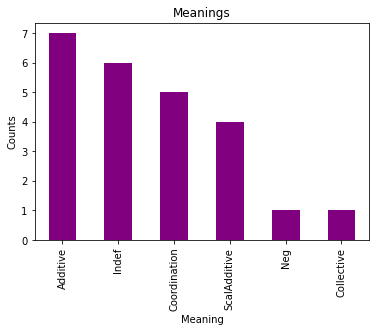

In [10]:
data['Meaning'].value_counts().plot.bar(color='purple'); # барплот сразу из датафрейма
plt.title('Meanings')
plt.xlabel('Meaning')
plt.ylabel('Counts')

From the graph you can see that most often the particle occurs in Additive function. This looks to be expected, since this function is considered the main function for this particle.

Secondly, let's look at the distribution of using different functions with different parts of speech. To do this, I will use a bar chat again, but inside which different parts of speech will be marked by colors.

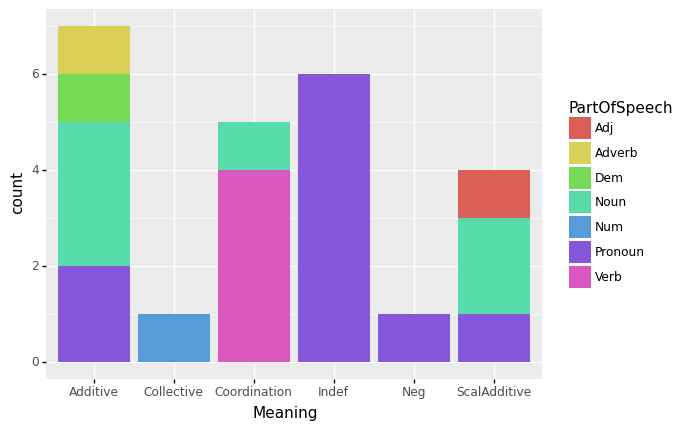

<ggplot: (-9223363266941240979)>

In [11]:
ggplot(data, aes(x='Meaning', fill = 'PartOfSpeech')) + \
    geom_bar(stat = 'count')

You can see that only pronouns are found in the Indef function. It can also be noted that in Coordination function, the particle occurs most often after the verb. In an Additive function, the particle is attached to a greater variety of parts of speech than in other functions.

Thirdly, let's create a pie graph showing the ratio of the particle usage at the end of the clause and in other positions.

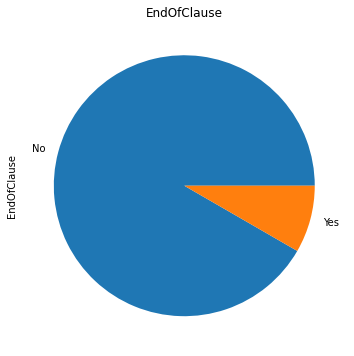

In [12]:
plt.figure(figsize=(6, 6))
data['EndOfClause'].value_counts().plot(kind='pie');
plt.title('EndOfClause');

This graph shows that the particle is extremely rare at the end of a sentence.

The last graph shows in which functions the particle occurs at the end of a sentence and in other positions. In this case, it is more convenient to use not color filling, but several columns, since only two parameters are considered along the X axis.

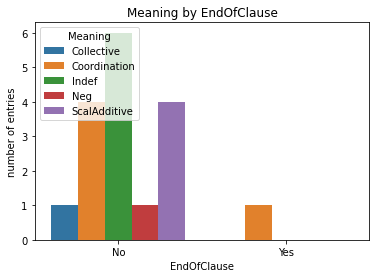

In [15]:
df2 = data[
    (data['Meaning'] != '') & (data['Meaning'] != 'Additive')
][
    ['EndOfClause', 'Meaning', 'StressOnClitic']
].groupby(['EndOfClause', 'Meaning'], as_index=False).count()

df2.columns = ['EndOfClause', 'Meaning', 'total']
sns.barplot(x="EndOfClause", y="total", hue='Meaning', data=df2)
plt.title('Meaning by EndOfClause')
plt.xlabel('EndOfClause')
plt.ylabel('number of entries');

This graph allows us to conclude that at the end of the sentence, the particle occurs only in Coordination function.